In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling and Mean Normalization

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(train.drop('label', axis=1))

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(train.drop('label', axis=1))

/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [12]:
scaled_test_features = scaler.transform(test)

/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [13]:
scaled_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
scaled_test_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
df_feat = pd.DataFrame(scaled_features, columns=train.columns[1:])

In [16]:
df_feat_test = pd.DataFrame(scaled_test_features, columns=test.columns)

In [18]:
df_feat.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


In [19]:
df_feat_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


# Reducing Feature Size using PCA

In [21]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=100)

In [21]:
pca.fit(df_feat)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
x_pca = pca.transform(df_feat)

In [23]:
x_pca.shape

(42000, 100)

In [24]:
df_feat.shape

(42000, 784)

# Splitting Data into Training and Cross-Validation sets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = x_pca
y = train['label']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model

In [23]:
from sklearn.linear_model import LogisticRegression

In [259]:
logmodel = LogisticRegression(C=0.046, solver='lbfgs', max_iter=1000)

In [260]:
logmodel.fit(X_train, y_train)

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.046, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [261]:
preds = logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [263]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1200
           1       0.95      0.98      0.97      1389
           2       0.91      0.89      0.90      1294
           3       0.89      0.87      0.88      1355
           4       0.90      0.93      0.92      1222
           5       0.86      0.86      0.86      1085
           6       0.94      0.96      0.95      1256
           7       0.93      0.91      0.92      1359
           8       0.89      0.87      0.88      1209
           9       0.89      0.89      0.89      1231

   micro avg       0.91      0.91      0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



In [264]:
print(confusion_matrix(y_test, preds))

[[1172    0    3    0    3    7   11    0    3    1]
 [   0 1357    9    3    1    5    1    2   10    1]
 [   9   13 1151   28   20   11   15   16   30    1]
 [   3    4   38 1173    3   54    5   18   36   21]
 [   3    6   10    4 1136    5    8    3    7   40]
 [  11    4    6   43   19  936   28    5   22   11]
 [   8    3    6    0    7   14 1207    1   10    0]
 [   2    5   23    7   23    5    1 1242    4   47]
 [   9   25   11   33   13   40    9    2 1049   18]
 [  11    5    4   20   31   13    0   40   10 1097]]


# Logistic Regression with Cross-Validation

In [191]:
from sklearn.linear_model import LogisticRegressionCV

In [204]:
cvmodel = LogisticRegressionCV(Cs=4, solver='lbfgs', max_iter=5000, cv=2, n_jobs=3)

In [205]:
cvmodel.fit(X_train, y_train)

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegressionCV(Cs=4, class_weight=None, cv=2, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=5000,
           multi_class='warn', n_jobs=3, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [208]:
cvmodel.Cs_

array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04])

In [212]:
cvmodel.C_

array([0.04641589, 0.04641589, 0.04641589, 0.04641589, 0.04641589,
       0.04641589, 0.04641589, 0.04641589, 0.04641589, 0.04641589])

In [213]:
cvpreds = cvmodel.predict(X_test)

In [214]:
print(classification_report(y_test, cvpreds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1200
           1       0.95      0.98      0.96      1389
           2       0.91      0.89      0.90      1294
           3       0.89      0.86      0.87      1355
           4       0.91      0.93      0.92      1222
           5       0.85      0.85      0.85      1085
           6       0.94      0.95      0.95      1256
           7       0.92      0.91      0.92      1359
           8       0.88      0.87      0.88      1209
           9       0.89      0.88      0.88      1231

   micro avg       0.91      0.91      0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



In [215]:
print(confusion_matrix(y_test, cvpreds))

[[1166    0    2    0    5   11   11    0    4    1]
 [   1 1358    7    2    1    3    1    4   11    1]
 [   9   10 1156   30   21   10    7   18   31    2]
 [   3    7   42 1166    2   55    7   21   32   20]
 [   2    7    9    4 1137    6    7    2    8   40]
 [  14    4    5   41   19  924   28    6   34   10]
 [   9    4    9    1   10   17 1196    0   10    0]
 [   2    8   24   14   17    4    1 1235    3   51]
 [   8   25   12   31    9   40    9    4 1056   15]
 [  10    6    7   22   30   12    1   46   12 1085]]


In [265]:
pca_params = [100, 200, 300, 350, 400, 450, 500, 600]
error_vals = []

for i in pca_params:
    pca = PCA(n_components=i)
    pca.fit(df_feat)
    x_pca = pca.transform(df_feat)
    X_train, X_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.3, random_state=42)
    logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
    logmodel.fit(X_train, y_train)
    pred_i = logmodel.predict(X_val)
    error_vals.append(np.mean(pred_i != y_val))

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ha

In [267]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'PCA components vs. Prediction Error')

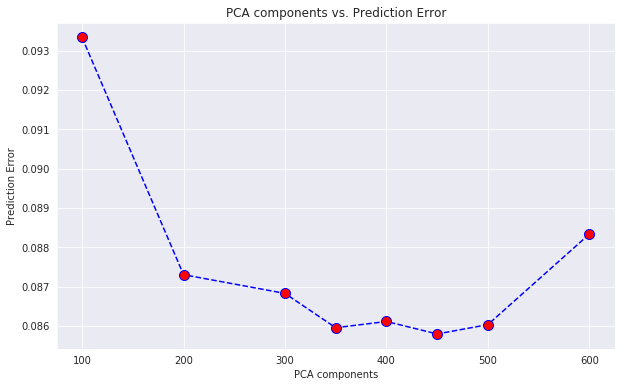

In [268]:
plt.figure(figsize=(10,6))
plt.plot(pca_params, error_vals, marker='o', linestyle='--', color='blue', markersize=10, markerfacecolor='red')
plt.xlabel('PCA components')
plt.ylabel('Prediction Error')
plt.title('PCA components vs. Prediction Error')

# Choosing 450 PCA components

In [35]:
pca = PCA(n_components=450)
pca.fit(df_feat)
x_pca = pca.transform(df_feat)

In [36]:
x_test_pca = pca.transform(df_feat_test)

In [37]:
x_pca.shape

(42000, 450)

In [38]:
x_test_pca.shape

(28000, 450)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.3, random_state=101)

In [40]:
y_train.head()

15388    8
38298    6
13109    5
4521     3
39509    0
Name: label, dtype: int64

In [41]:
X_train

array([[-3.5925572 , -4.57166065,  3.70354197, ...,  0.024288  ,
         0.33533645,  0.23704762],
       [11.0169831 ,  0.42263601,  3.37714507, ...,  0.46789331,
         0.19691658, -0.10276044],
       [-3.17185312, -6.10293285, -1.27091198, ..., -0.19594565,
        -0.13666246,  0.17885588],
       ...,
       [-1.77838775,  7.69603128, 14.02337584, ...,  0.33847298,
        -0.17849697,  0.46526616],
       [-7.31384019,  1.32880711, -6.42136299, ...,  0.16549822,
         0.25438628, -0.06686971],
       [ 1.3228378 , 12.94413987, -9.42328395, ..., -0.41661221,
         0.75336278,  0.12494485]])

In [41]:
c_params = {'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0]}

In [29]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_model = GridSearchCV(LogisticRegression(verbose=3, max_iter=1000, solver='lbfgs'), c_params)

In [44]:
grid_model.fit(X_train, y_train)

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.2s finished
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   58.8s finished
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.3s remaining:    0.0s
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/l

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: Future

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=3, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
grid_model.best_index_

1

In [46]:
grid_model.best_params_

{'C': 0.1}

In [47]:
grid_model.best_score_

0.912891156462585

In [48]:
grid_model.cv

'warn'

In [49]:
grid_model.error_score

'raise-deprecating'

In [50]:
grid_model.cv_results_

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/harsh/anaconda3/lib/python3.

{'mean_fit_time': array([ 6.30749305, 12.75790755, 23.05322901, 30.32559816, 59.93350395,
        78.24286493, 89.17323399]),
 'std_fit_time': array([0.00710823, 0.43714783, 0.59118968, 0.25440699, 0.90364971,
        0.9995986 , 0.39062292]),
 'mean_score_time': array([0.01020948, 0.00906817, 0.00889174, 0.00904369, 0.0097309 ,
        0.00931636, 0.00964348]),
 'std_score_time': array([0.00128651, 0.00035389, 0.00016792, 0.00014593, 0.00064113,
        0.00029904, 0.00034249]),
 'param_C': masked_array(data=[0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01},
  {'C': 0.1},
  {'C': 0.5},
  {'C': 1.0},
  {'C': 5.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.91615667, 0.91758466, 0.91452468, 0.91370869, 0.91075071,
        0.90789474, 0.90259078]),
 'split1_test_score': array([0.91141953, 0.90988876, 0.90733748, 0.904378  , 0.9006021

In [51]:
gridpreds = grid_model.predict(X_val)

In [52]:
print(classification_report(y_val, gridpreds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1213
           1       0.96      0.97      0.96      1422
           2       0.92      0.88      0.90      1258
           3       0.89      0.89      0.89      1284
           4       0.90      0.95      0.92      1209
           5       0.88      0.86      0.87      1121
           6       0.94      0.95      0.94      1242
           7       0.93      0.93      0.93      1315
           8       0.88      0.87      0.88      1227
           9       0.90      0.87      0.89      1309

   micro avg       0.92      0.92      0.92     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.92      0.92      0.92     12600



In [53]:
print(confusion_matrix(y_val, gridpreds))

[[1182    0    5    3    2    4    9    0    7    1]
 [   0 1378   10    5    1    5    5    1   16    1]
 [   8   15 1107   26   21    9   14   19   34    5]
 [   6    6   32 1144    5   38    5    7   21   20]
 [   2    3    6    2 1149    2    6    5    8   26]
 [  13    3    6   53   17  962   24    7   29    7]
 [   7    4   15    0    7   20 1174    0   15    0]
 [   3    3   11    6   20    2    1 1224    4   41]
 [  10   18   12   26   10   40   11    8 1072   20]
 [  10   10    2   27   46   11    1   43   14 1145]]


In [57]:
test_preds = grid_model.predict(x_test_pca)

In [58]:
test_preds

array([2, 0, 9, ..., 3, 9, 2])

In [56]:
submit = pd.read_csv('sample_submission.csv', index_col=0)
submit.head()

,Label
ImageId,
1,0
2,0
3,0
4,0
5,0


In [59]:
submit['Label'] = test_preds

In [60]:
submit.head()

,Label
ImageId,
1,2
2,0
3,9
4,4
5,3


In [61]:
submit.to_csv('submission.csv')

# SVM

In [42]:
from sklearn.svm import SVC

In [43]:
grid_params = {'C': [0.01, 0.1, 1.0, 10.0, 100.0], 'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001]}

In [44]:
grid_svc = GridSearchCV(SVC(), grid_params, verbose=3)

In [ ]:
grid_svc.fit(X_train, y_train)

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ...... C=0.01, gamma=1.0, score=0.1109751121991024, total=11.8min
[CV] C=0.01, gamma=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.9min remaining:    0.0s


[CV] ..... C=0.01, gamma=1.0, score=0.11092968670272477, total=12.5min
[CV] C=0.01, gamma=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 34.4min remaining:    0.0s


[CV] ..... C=0.01, gamma=1.0, score=0.11095233234663672, total=12.4min
[CV] C=0.01, gamma=0.1 ...............................................


In [ ]:
pred_svc = grid_svc.predict(X_val)

In [ ]:
print(classification)